## Adaboost decision tree

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('train.csv')
X = df.iloc[:, 1:-2]
y = df.iloc[:, -1]
table = df.describe()


In [57]:
X.head()

,gender,age,vessel,seg,OS_PB40,OS_PB70,OS_MLA,MLA,EEM_MLA,PB_MLA,...,RI_MLA_ref,RI_MLA_prox5,RI_worst_ref,RI_worst_prox5,variance_lumen_worst,variance_lumen_PB40,variance_plaque_worst,variance_plaque_PB40,long_eccentricity_worst,long_eccentricity_PB40
0,1,58,2,3,539,0,2137,3.092339,7.581687,0.592130,...,0.590296,0.492246,0.628797,0.524351,0.502976,15.752692,0.497278,7.221237,0.051671,0.550465
1,1,76,3,2,0,0,494,3.060281,17.569856,0.825822,...,0.000000,0.000000,0.000000,0.000000,1.312833,5.876139,4.643138,1.027108,0.186335,0.613665
2,2,70,1,2,0,0,1060,3.450544,13.905366,0.751855,...,0.000000,0.000000,0.000000,0.000000,0.223531,11.209799,0.707185,9.101215,0.069061,0.488029
3,1,58,1,1,0,0,1073,1.953591,8.873550,0.779841,...,0.000000,0.000000,0.000000,0.000000,0.961234,2.237851,2.101279,1.537554,0.068618,0.490851
4,1,58,1,1,0,565,1433,1.954800,6.538078,0.701013,...,0.000000,0.000000,0.000000,0.000000,0.207268,4.844191,0.285078,6.244298,0.075796,0.724103


In [25]:
x_tr, x_tst, y_tr, y_tst = train_test_split(X, y, test_size = 0.2)

In [26]:
x_tr.shape

(797, 111)

In [27]:
y_tr.shape

(797,)

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
#stumps = [275,300,325,350,375]
stumps = [75,100,125,150,175,200,225,250,275,300,325]

prob_list = []
label_list = []

lrate = [.001, .002, .003, .004, .005, .006, .007]
lossDict = {}
accDict = {}
for j in lrate: 
    loss_list = []
    acc_list = []
    for i in stumps:
        clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), algorithm = 'SAMME',  learning_rate = j, n_estimators= i, random_state=0)
        clf.fit(x_tr, y_tr)
        acc = clf.score(x_tst, y_tst)
        prob = clf.predict_proba(x_tst)
        label = clf.predict(x_tst)
        acc_list.append(acc)
        prob_list.append(prob)
        label_list.append(label)
        logloss = log_loss(y_tst, prob)
        loss_list.append(logloss)
    lossDict[j] = loss_list
    accDict[j] = acc_list

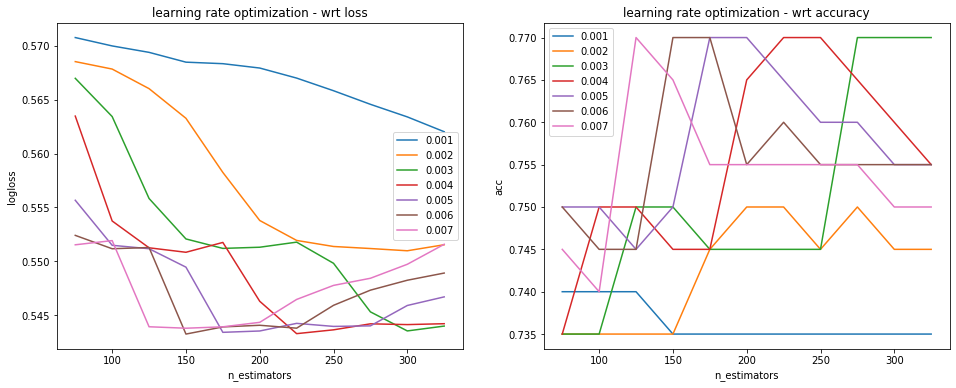

In [52]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
for i in lrate:
    plt.plot(stumps, lossDict[i], label=i)
plt.ylabel('logloss')
plt.xlabel('n_estimators')
plt.title('learning rate optimization - wrt loss')
plt.legend()

plt.subplot(1,2,2)
for i in lrate:
    plt.plot(stumps, accDict[i], label=i)
plt.ylabel('acc')
plt.xlabel('n_estimators')
plt.title('learning rate optimization - wrt accuracy')
plt.legend()

In [53]:
clf0 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), algorithm = 'SAMME',  learning_rate = 0.005, n_estimators= 175, random_state=0)
clf0.fit(x_tr, y_tr)
acc = clf0.score(x_tst, y_tst)
prob = clf0.predict_proba(x_tst)
label = clf0.predict(x_tst)
logloss = log_loss(y_tst, prob)
topfeatures = clf0.feature_importances_

In [54]:
print ('acc = %.4f'% acc, 'logloss = %.4f ' % logloss)

acc = 0.7700 logloss = 0.5434 


In [56]:
from sklearn.metrics import recall_score, f1_score, precision_score
recall = recall_score(y_tst, label)
precision = precision_score(y_tst, label)
fscore = f1_score(y_tst, label)
print('recall = %0.4f' %recall, 'fscore = %0.4f' %fscore, 'precision = %0.4f' %precision)

recall = 0.4559 fscore = 0.5741 precision = 0.7750


## Summary

##### The adaboost decision tree had moderate results.  With respect to validation data, the accuracy was 0.77 and log loss was 0.54.  The recall was 0.46 and so it does not do well when trying to predict the true label, stent in our case.  It's correct less than 50% of the time.  When the model does predict the true label it's performance is moderate with precision of 0.78.    Hyperparameter search was performed on both number of estimators (stumps) and learning rate.  The plots above show that the best learning rate was 0.005 and the best number of estimators was 175.  